# Robot Baseball (2025 October Jane Street puzzle)

https://www.janestreet.com/puzzles/robot-baseball-index/

## 0. Introduction

First, we explain the solution in detail and write code using **Sympy**, a Python library for symbolic mathematics, so that it is easier to follow the explanations. This corresponds to sections 1 to 5.

After that, we present the “same” code, but much more optimized and significantly faster. This can be found in section 6, at the end.


## 1. The optimal strategy

We first want to find what the best strategy is for both the pitcher and the batter.

Each at-bat has states $(b,s)$ denoting how many *balls* and *strikes* there are in it. For example, before the at-bat starts, the state is $(0,0)$.

Let $V(b,s)$ denote the expected value of the at-bat at the current state $(b,s)$, assuming the pitcher and the batter are both playing using the optimal strategy. This is denoted by `V[(b,s)]` (as a dict) in the forthcoming Python code.

Here we list the terminal states with their expected values:
* $(4, \cdot)$ has expected value $V(4, \cdot) = 1$.
* $(\cdot, 3)$ has expected value $V(\cdot, 3) = 0$.

The other terminal state is *home run*, denoted by `'HR'`, and it is directly considered in the computations below with expected value $V(\text{'HR'}) = 4$.

We now want to find $x, y = x(b,s), y(b,s)$ such that, at the state $(b,s)$, the pitcher does:
* “ball” with probability $x$,
* “strike” with probability $1 - x$,

and the batter:
* “wait” with probability $y$,
* “swing” with probability $1 - y$.

If the batter chooses “wait”, then the expected value is
$$
x V(b+1,s) + (1 - x)V(b,s+1),
$$
and if he chooses “swing”, then
$$
xV(b,s+1) + (1 - x)\big(pV(\text{HR}) + (1 - p)V(b,s+1)\big).
$$

As the pitcher wants to minimize (i.e., he does not want to give the chance to maximize to the batter), these two values must be the same. That is, after replacing $V(\text{HR}) = 4$,
$$
x V(b+1,s) + (1 - x)V(b,s+1) = xV(b,s+1) + (1 - x)\big(4p + (1 - p)V(b,s+1)\big),
$$
which gives
$$
x = \frac{p \big(4 - V(b,s+1)\big)}{V(b+1,s) - V(b,s+1) + p\big(4 - V(b,s+1)\big)}.
$$

The computations are the same for the other case and therefore
$$
y = x.
$$

The optimal strategy at state $(b,s)$ is denoted by $S(b,s) = x = x(b,s)$ (and `S[(b,s)]` as a dict in the Python code below).

Having computed $x$ and $y$, and therefore the optimal strategy for each player at each step, with $x$ as above, the expected value is therefore
$$
V(b,s) = x V(b+1,s) + (1 - x)V(b,s+1),
$$
because those two values are the same.

All in all, at state $(b,s)$ the expected value is $V(b,s)$ (computed above), and the optimal strategy is:
* pitcher: “ball” with probability $S(b,s)$ and “strike” with $1 - S(b,s)$,
* batter: “wait” with probability $S(b,s)$ and “swing” with $1 - S(b,s)$.

In [ ]:
import sympy as sp

In [ ]:
p = sp.Symbol("p",real=True,positive=True)

V = {#'HR': sp.Integer(4), #not used
    (4,0): sp.Integer(1), (4,1): sp.Integer(1), (4,2): sp.Integer(1),
    (0,3): sp.Integer(0), (1,3): sp.Integer(0), (2,3): sp.Integer(0), (3,3): sp.Integer(0),
    }

S = {} #x represents (x, 1-x) for (ball, strike) and (wait, swing)

def bt_V(b,s):
    if (b,s) not in V:
        print(f'Computing V[({b},{s})]')
        aux_b1 = bt_V(b+1,s)
        aux_s1 = bt_V(b,s+1)
        aux = 4 - aux_s1
        x = sp.cancel(p*aux / (aux_b1-aux_s1+p*aux))
        S[(b,s)] = x
        V[(b,s)] = sp.cancel(x*aux_b1 + (1-x) * aux_s1)
        print(f'End of computing V[({b},{s})]')

    return V[(b,s)]

bt_V(0,0)



Computing V[(0,0)]
Computing V[(1,0)]
Computing V[(2,0)]
Computing V[(3,0)]
Computing V[(3,1)]
Computing V[(3,2)]
End of computing V[(3,2)]
End of computing V[(3,1)]
End of computing V[(3,0)]
Computing V[(2,1)]
Computing V[(2,2)]
End of computing V[(2,2)]
End of computing V[(2,1)]
End of computing V[(2,0)]
Computing V[(1,1)]
Computing V[(1,2)]
End of computing V[(1,2)]
End of computing V[(1,1)]
End of computing V[(1,0)]
Computing V[(0,1)]
Computing V[(0,2)]
End of computing V[(0,2)]
End of computing V[(0,1)]
End of computing V[(0,0)]


(79496847203390844133441536*p**49 + 1854926434745786363113635840*p**48 + 21215721097404931528112209920*p**47 + 158612956034411744617549529088*p**46 + 872103719248191648345121357824*p**45 + 3761914390917811288755016826880*p**44 + 13262012392079187717095694532608*p**43 + 39301380813590842866822052577280*p**42 + 99941229569579234230091812700160*p**41 + 221526431982026384187560640380928*p**40 + 433301082040513295271092646051840*p**39 + 755305586891297616733636625694720*p**38 + 1182831972259788278563451688714240*p**37 + 1675266231108330776122415156035584*p**36 + 2157837888993020136933620535263232*p**35 + 2539531582917290101347112621965312*p**34 + 2741528712181027221486311621787648*p**33 + 2723768974300790714599938830893056*p**32 + 2497398502133000955446775862788096*p**31 + 2118093407918541758096762413252608*p**30 + 1664802489279681345129955849469952*p**29 + 1214508985174743052300389973426176*p**28 + 823328111255583633863366120914944*p**27 + 519108248793010237465351108313088*p**26 + 30458417

## 2. The probability of arriving at state (3,2)

We have computed the optimal strategy $S(b,s)$ at each stage $(b,s)$.

Now we want to compute the probability $q = q(p)$ that an at-bat arrives at state $(b,s) = (3,2)$, i.e., 3 balls and 2 strikes. Note that any move after the state $(3,2)$ will end the game.  

In the following computations, $P(b,s)$ (or `P[(b,s)]` in Python) denotes the probability that the at-bat arrives at the state $(b,s)$, starting from $(0,0)$. In particular, $P(0,0) = 1$.

The probabilities are therefore computed recursively. We can arrive at $(b,s)$:
* from $(b-1,s)$ if the pitcher throws a “ball” at state $(b-1,s)$ (probability $S(b-1,s)$) and the batter chooses “wait” (probability $S(b-1,s)$). Hence, with probability
  $$
  S(b-1,s)^2.
  $$
* from $(b,s-1)$ if either:
  - pitcher = “strike” (probability $1 - S(b,s-1)$) and batter = “wait” (probability $S(b,s-1)$),
  - pitcher = “ball” (probability $S(b,s-1)$) and batter = “swing” (probability $1 - S(b,s-1)$), or
  - pitcher = “ball” (probability $S(b,s-1)$), batter = “swing” (probability $1 - S(b,s-1)$), with no home run (probability $1 - p$).

  Hence, with probability
  $$
  2 S(b,s-1) (1 - S(b,s-1)) + (1 - S(b,s-1))^2 (1 - p).
  $$

All in all, we have
$$
P(b,s) = P(b-1,s) S(b-1,s)^2 + P(b,s-1) \big[ 2 S(b,s-1)(1 - S(b,s-1)) + (1 - S(b,s-1))^2 (1 - p) \big].
$$

Of course, $P(b,s) = 0$ if $b < 0$ or $s < 0$, and therefore these cases are not considered in the computations done below in the code.

In [ ]:
#Now want to compute the prob that the match arrives to b=3 and s=2
P={(0,0):sp.Integer(1)}

def bt_p(b,s):
    if (b,s) not in P:
        print(f'Computing P[({b},{s})]')
        sol = 0

        if b>=1: #otherwise, b-1<0 and hence
            S_b1 = S[(b-1,s)]
            sol += bt_p(b-1,s) * S_b1**2

        if s>=1: #same as above for b
            S_s1 = S[(b,s-1)]
            sol += bt_p(b,s-1) * ( 2*(1-S_s1)*S_s1 + (1-S_s1)**2 * (1-p) )

        P[(b,s)] = sp.cancel(sol)

        print(f'End of computing P[({b},{s})]')

    return P[(b,s)]

q = bt_p(3,2)
print(q)

Computing P[(3,2)]
Computing P[(2,2)]
Computing P[(1,2)]
Computing P[(0,2)]
Computing P[(0,1)]
End of computing P[(0,1)]
End of computing P[(0,2)]
Computing P[(1,1)]
Computing P[(1,0)]
End of computing P[(1,0)]
End of computing P[(1,1)]
End of computing P[(1,2)]
Computing P[(2,1)]
Computing P[(2,0)]
End of computing P[(2,0)]
End of computing P[(2,1)]
End of computing P[(2,2)]
Computing P[(3,1)]
Computing P[(3,0)]
End of computing P[(3,0)]
End of computing P[(3,1)]
End of computing P[(3,2)]
(93625906893026232235880506947968789351102393037619200*p**90 + 3829124043349348474262070458221396042980054558251679744*p**89 + 77487477660443732267242702258384513549542848561984569344*p**88 + 1034502019982972083842514706920041822897430267489865957376*p**87 + 10250632505797183588203891206633854879816216462661466980352*p**86 + 80411139227768802602216944037138202512532665675510351659008*p**85 + 520179619467178591285371173046589581135278222681436321742848*p**84 + 28542461253330961429568908823241626885769

## 3. Plot of $q=q(p)$ for $p\in [0,1]$.

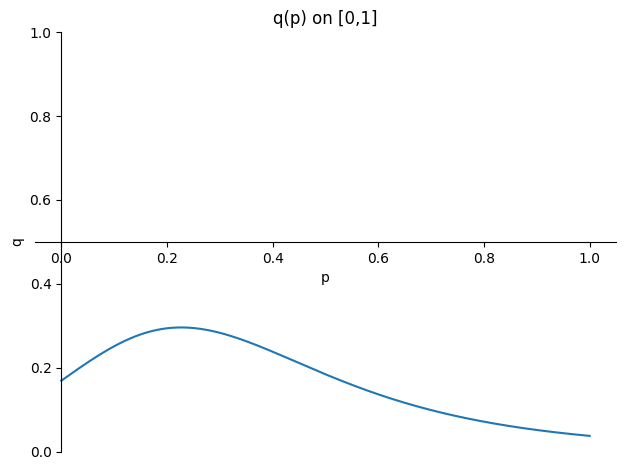

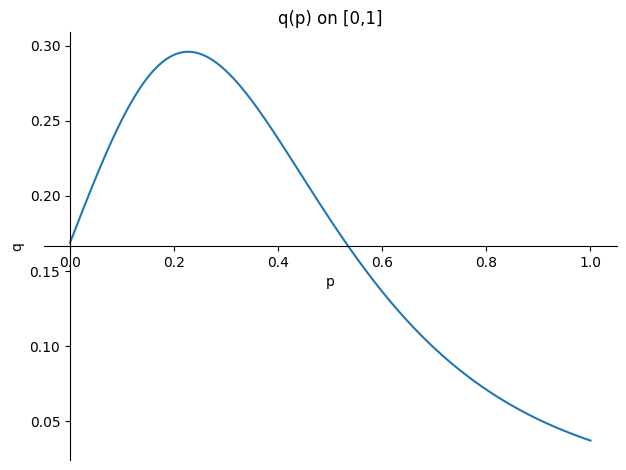

In [ ]:
'''PLOT OF q=q(p)'''
sp.plot(q, (p, 0, 1), show=True, xlabel="p", ylabel="q", title="q(p) on [0,1]", ylim=(0, 1))

'''PLOT OF q=q(p)'''
sp.plot(q, (p, 0, 1), show=True, xlabel="p", ylabel="q", title="q(p) on [0,1]")

## 4. Maximum of $q = q(p)$

Given the plot above, it's clear that there is exactly one maximum, and it is found somewhere between 0.1 and 0.4, say.

Our strategy to find the maximum with good enough precision relies on the fact that this function has a unique maximum and is strictly increasing before that maximum.

We will choose a precision parameter called `step`, and move along the $x$-axis as long as the function starts to increase. Specifically, at each step we have points $p_0$, $p_1 = p_0 + \text{step}$, and $p_2 = p_1 + \text{step}$, and the maximum must lie in some $p \in [p_0, p_2]$ exactly when $q(p_1) > q(p_0)$ but $q(p_2) \leq q(p_1)$.

When this condition is found, we repeat the same process with a new step size, which is 10 times smaller, so that the precision for $p$ (and consequently for $q$) improves at each iteration.


In [ ]:
x_start = 0
iters = 30  # number of refinements (precision ~ 10^-iters)

p_max = 0
q_max = -1

for i in range(1, iters+1):
    step = 1/10**i
    q_x_start = q.subs(p, x_start)
    q_x_start_previous = q_x_start
    for _ in range(20):
        q_x_start_next = q.subs(p, x_start + step)
        if q_x_start_next > q_x_start:
            x_start += step
        else:
            #current max between (x_start-p, q(...)) and (x_start,q(...))
            curr_q_max = q_x_start_previous
            curr_p_max = x_start-step
            if q_x_start > curr_q_max:
                curr_q_max = q_x_start
                curr_p_max = x_start

            #print(f'Iter {i}/{iters}: q(p) = {curr_q_max} for p = {curr_p_max}')

            #update the max all time
            if curr_q_max > q_max:
                q_max = curr_q_max
                p_max = curr_p_max
                #print that a new all time max is found
                print(f'NEW MAX FOUND AT ITER {i}/{iters}: q(p) = {q_max} for p = {p_max}')

            #since the maximum must be in (x_start-step,x_start+step), we start again in 'x_start-step' with a thiner 'step'
            x_start -= step
            break

        q_x_start_previous = q_x_start
        q_x_start = q_x_start_next

print(f'MAX FOUND: q(p) = {q_max} for p = {p_max}')

NEW MAX FOUND AT ITER 1/30: q(p) = 0.293964353210921 for p = 0.2
NEW MAX FOUND AT ITER 2/30: q(p) = 0.295943504579120 for p = 0.2300000000000001
NEW MAX FOUND AT ITER 3/30: q(p) = 0.295967991452396 for p = 0.2270000000000001
NEW MAX FOUND AT ITER 5/30: q(p) = 0.295967993346243 for p = 0.22697000000000006
NEW MAX FOUND AT ITER 6/30: q(p) = 0.295967993374127 for p = 0.22697300000000006
NEW MAX FOUND AT ITER 7/30: q(p) = 0.295967993374269 for p = 0.2269732000000001
NEW MAX FOUND AT ITER 8/30: q(p) = 0.295967993374272 for p = 0.22697323000000003
MAX FOUND: q(p) = 0.295967993374272 for p = 0.22697323000000003


## 5. The solution

In [ ]:
print(f'\033[1;92mThe maximum of q(p) is {q_max:.10f}\033[0m for p = {p_max}')

The maximum of q(p) is 0.2959679934 for p = 0.22697323000000003


## 6. The optimized (same) solution

The code below is an optimized (non-Sympy) and much faster solution.

In [ ]:
import numpy as np
from functools import lru_cache
from scipy.optimize import minimize_scalar

# terminal payoffs
V_term = {
    (4,0): 1.0, (4,1): 1.0, (4,2): 1.0,
    (0,3): 0.0, (1,3): 0.0, (2,3): 0.0, (3,3): 0.0,
}

# memoized recursion storing both value and strategy
@lru_cache(maxsize=None)
def bt(b, s, p):
    if (b,s) in V_term:
        return V_term[(b,s)], 0.0  # value, strategy
    aux_b1, _ = bt(b+1, s, p)
    aux_s1, _ = bt(b, s+1, p)
    aux = 4 - aux_s1
    x = (p*aux) / (aux_b1 - aux_s1 + p*aux)
    val = x*aux_b1 + (1-x)*aux_s1
    return val, x

# probability recursion, using stored strategy
@lru_cache(maxsize=None)
def bt_p(b, s, p):
    if (b,s) == (0,0):
        return 1.0
    sol = 0.0
    if b >= 1:
        _, S_b1 = bt(b-1, s, p)
        sol += bt_p(b-1, s, p) * S_b1**2
    if s >= 1:
        _, S_s1 = bt(b, s-1, p)
        sol += bt_p(b, s-1, p) * (2*(1-S_s1)*S_s1 + (1-S_s1)**2 * (1-p))
    return sol


# objective function
def q_numeric(p):
    return bt_p(3, 2, float(p))


# maximize q(p) for p in [0,1]

x_start = 0.1 #do not start with x_start=0 to avoid deviding by 0
iters = 1000  # number of refinements (precision ~ 10^-iters)

p_max = 0
q_max = -1

for i in range(1, iters+1):
    step = 1/10**i
    q_x_start = q_numeric(x_start)
    q_x_start_previous = q_x_start
    for _ in range(20):
        q_x_start_next = q_numeric(x_start + step)
        if q_x_start_next > q_x_start:
            x_start += step
        else:
            #current max between (x_start-p, q(...)) and (x_start,q(...))
            curr_q_max = q_x_start_previous
            curr_p_max = x_start-step
            if q_x_start > curr_q_max:
                curr_q_max = q_x_start
                curr_p_max = x_start

            #print(f'Iter {i}/{iters}: q(p) = {curr_q_max} for p = {curr_p_max}')

            #update the max all time
            if curr_q_max > q_max:
                q_max = curr_q_max
                p_max = curr_p_max
                #print that a new all time max is found
                print(f'NEW MAX FOUND AT ITER {i}/{iters}: q(p) = {q_max} for p = {p_max}')

            #since the maximum must be in (x_start-step,x_start+step), we start again in 'x_start-step' with a thiner 'step'
            x_start -= step
            break

        q_x_start_previous = q_x_start
        q_x_start = q_x_start_next

print('...')
print(f'\033[1;92mThe maximum of q(p) is {q_max:.10f}\033[0m for p = {p_max}')
print('...')

NEW MAX FOUND AT ITER 1/1000: q(p) = 0.2939643532109209 for p = 0.2
NEW MAX FOUND AT ITER 2/1000: q(p) = 0.29594350457912 for p = 0.2300000000000001
NEW MAX FOUND AT ITER 3/1000: q(p) = 0.2959679914523961 for p = 0.2270000000000001
NEW MAX FOUND AT ITER 5/1000: q(p) = 0.29596799334624274 for p = 0.22697000000000006
NEW MAX FOUND AT ITER 6/1000: q(p) = 0.2959679933741271 for p = 0.22697300000000006
NEW MAX FOUND AT ITER 7/1000: q(p) = 0.2959679933742692 for p = 0.2269732000000001
NEW MAX FOUND AT ITER 8/1000: q(p) = 0.295967993374272 for p = 0.22697324000000002
NEW MAX FOUND AT ITER 10/1000: q(p) = 0.2959679933742721 for p = 0.22697322910000003
NEW MAX FOUND AT ITER 14/1000: q(p) = 0.29596799337427215 for p = 0.22697322898889002
...
The maximum of q(p) is 0.2959679934 for p = 0.22697322898889002
...
